In [3]:
import numpy as np
import powerbox as pbox
import pyccl as ccl

In [11]:
# plot settings
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 10}
matplotlib.rc('font', **font)

rcnew = {"mathtext.fontset" : "cm", 
         "legend.fontsize" : 36, #
         "axes.titlesize" : 32, 
         "axes.labelsize" : 36,
         "xtick.major.size" : 14,      
         "xtick.minor.size" : 10,      
         "ytick.major.size" : 14,      
         "ytick.minor.size" : 10, 
         "xtick.labelsize" : 32, 
         "ytick.labelsize" : 32, 
         
         "legend.fontsize" : 22,
         'figure.titlesize' : 30,
         'errorbar.capsize' : 4,
         'axes.xmargin': 0.05,
         'axes.ymargin': 0.05,
        }
plt.rcParams.update(rcnew)
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
  "text.usetex": True,
})

%config InlineBackend.figure_format = 'retina'


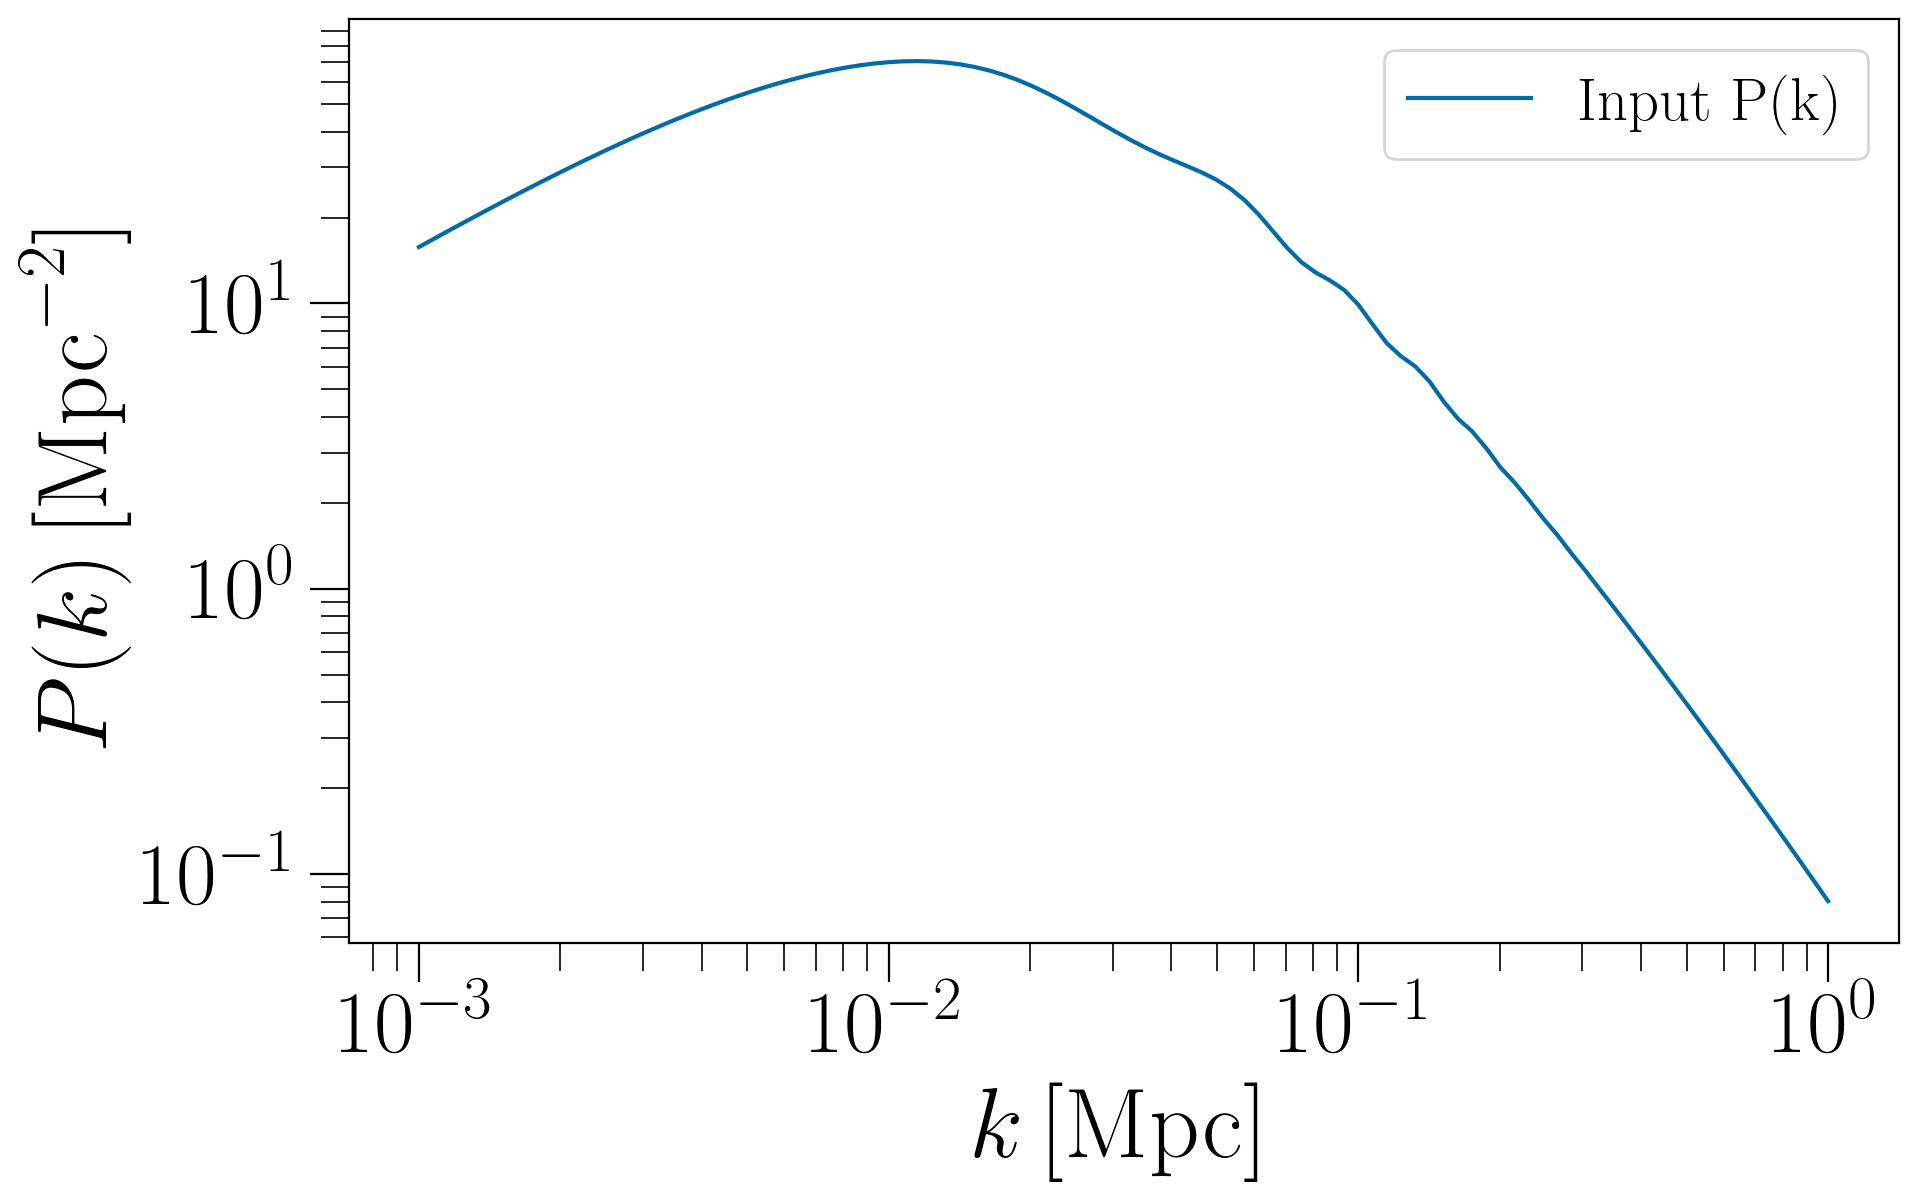

In [7]:
OmegaM = 0.3
sigma8 = 0.8

OmegaB = 0.05
OmegaC = OmegaM - OmegaB
h = 0.7
ns = 0.96
    
kmax = 0.
kmin = -3
num_points = 100
k = np.logspace(kmin,kmax, num_points)

Npixel = 100
BoxSize = 1000
    
# define CCL cosmology
cosmo_ccl = ccl.Cosmology(Omega_c=OmegaC, Omega_b=OmegaB, 
                          h=0.7, sigma8 = sigma8, n_s=ns, 
                          transfer_function='eisenstein_hu')


# compute the linear power spectrum
pk_ccl_lin = ccl.linear_matter_power(cosmo_ccl, k, 1.0)

plt.figure(figsize = (10, 6))
plt.plot(k,pk_ccl_lin/BoxSize,label='Input P(k)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k \, [\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \, [\mathrm{Mpc}^{-2}]$')
plt.legend(loc = 'best')
plt.show()

In [13]:
test_samples = 5

Npixel = 100
BoxSize = 1000

maps_gaussian  = []
pk_gaussian    = []
maps_lognormal = []
pk_lognormal   = []
    
for i in range(test_samples):
    
    if True:
        pb = pbox.PowerBox(
            N=Npixel,                     
            dim=2,                        
            pk = lambda k: ccl.linear_matter_power(cosmo_ccl, k, 1.0)/BoxSize, 
            boxlength = BoxSize,           
            seed = i,                
            
        )
        
        maps_gaussian.append(pb.delta_x())
        
        p_k_field, bins_field = pbox.get_power(pb.delta_x(), pb.boxlength)
        pk_gaussian.append(np.stack([bins_field,p_k_field]))
        
        
        ##################################
        delta_g = pb.delta_x()
        var_g = np.var(delta_g)
        rho_ln = np.exp(delta_g - var_g/2)
        
        maps_lognormal.append(rho_ln - 1)
        p_k_lnfield, bins_lnfield = pbox.get_power(rho_ln - 1, pb.boxlength)
        pk_lognormal.append(np.stack([bins_lnfield,p_k_lnfield]))
        ##################################


maps_gaussian = np.array(maps_gaussian)
pk_gaussian = np.array(pk_gaussian)
maps_lognormal = np.array(maps_lognormal)
pk_lognormal_ = np.array(pk_lognormal)

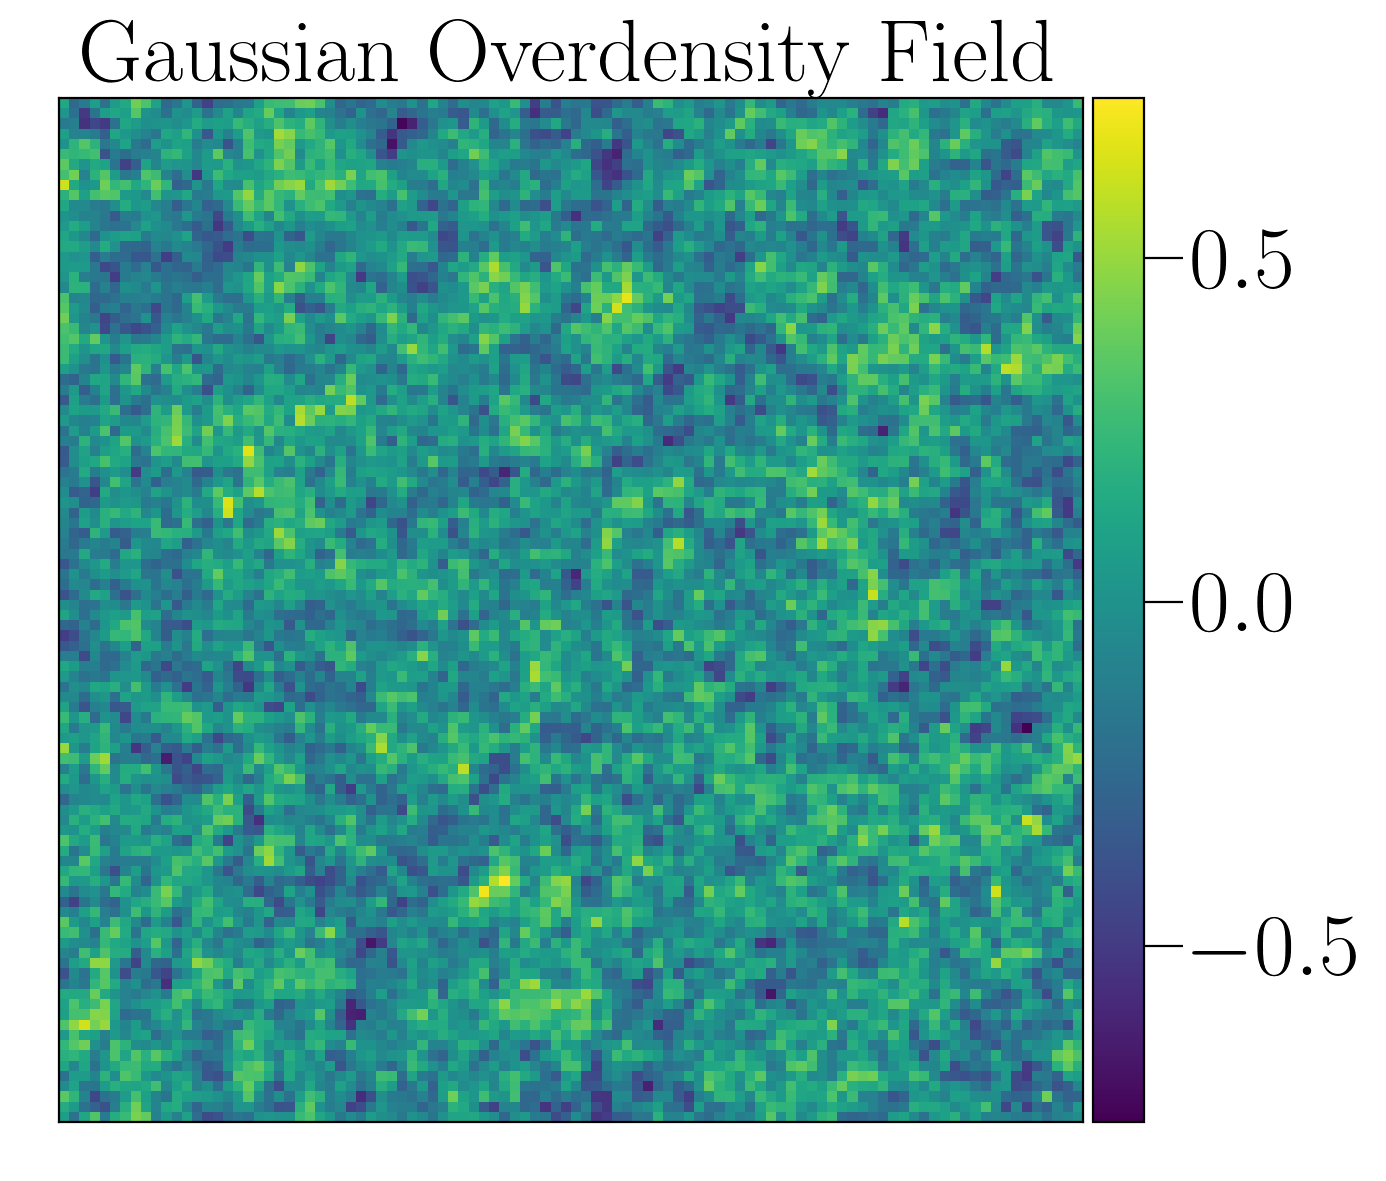

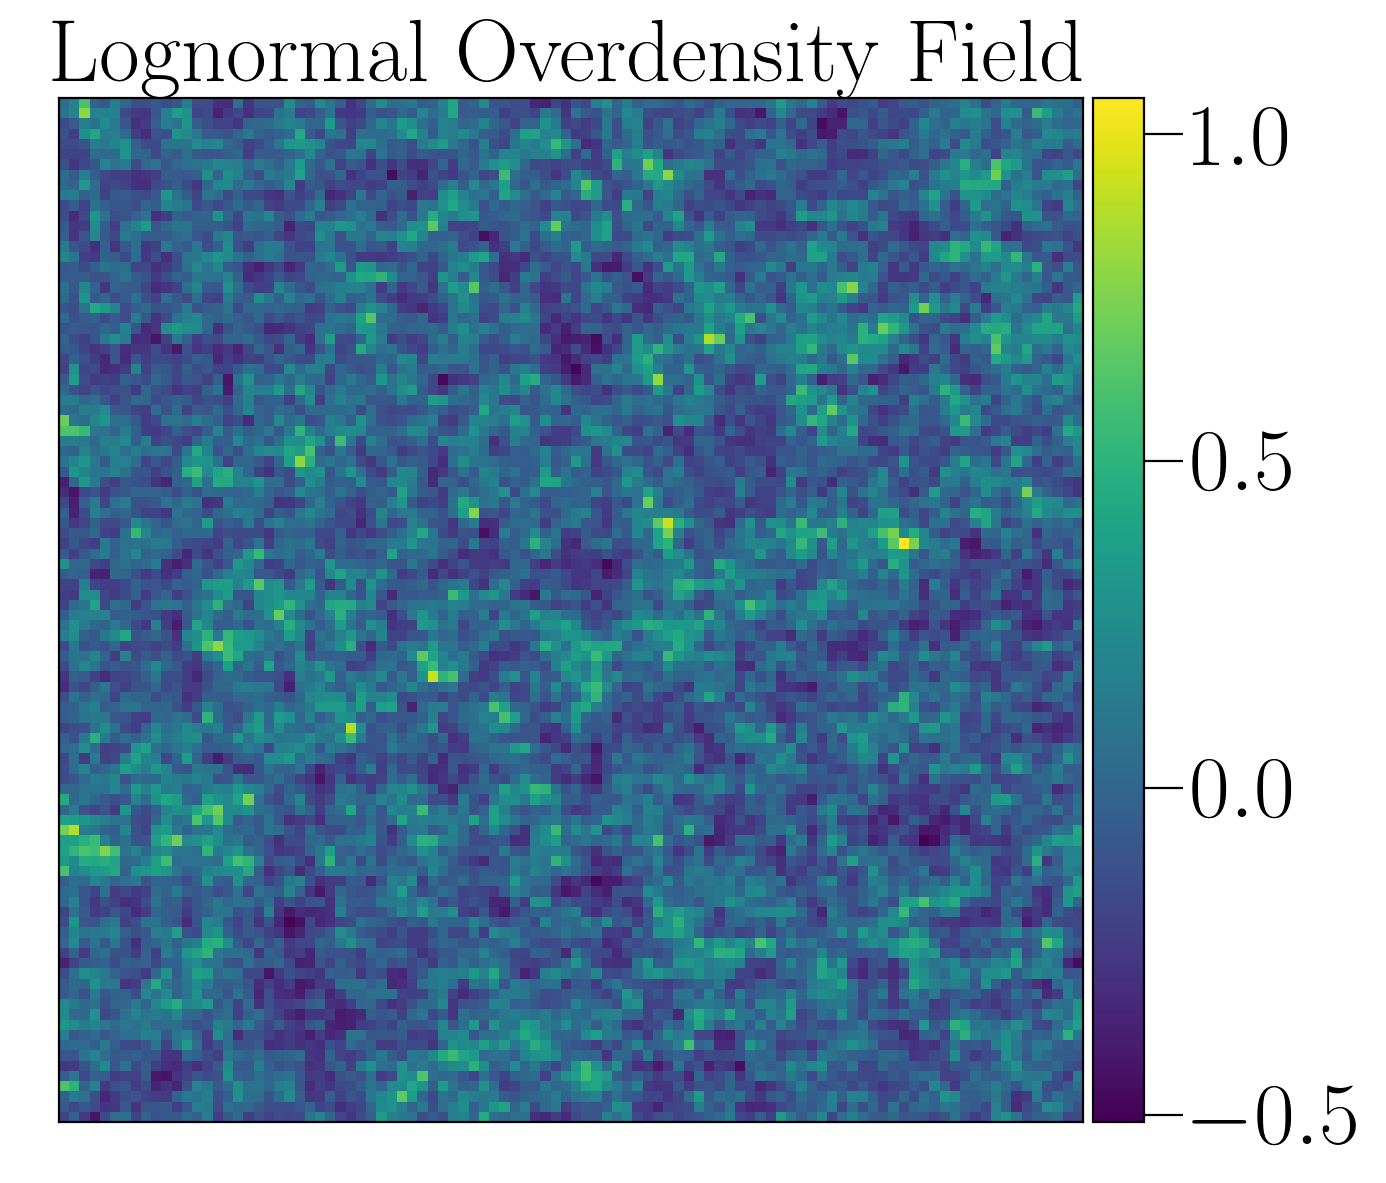

In [12]:
# plot gaussian field 
plt.figure(1, figsize = (7, 7))
ax = plt.gca()
plt.title('Gaussian Overdensity Field')
plt.xticks([])
plt.yticks([])
pcm = plt.imshow(maps_gaussian[0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(pcm, cax=cax)

######################
# plot lognormal field 
plt.figure(2, figsize = (7, 7))
ax = plt.gca()
plt.title('Lognormal Overdensity Field')
plt.xticks([])
plt.yticks([])
pcm = plt.imshow(maps_lognormal[0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(pcm, cax=cax)


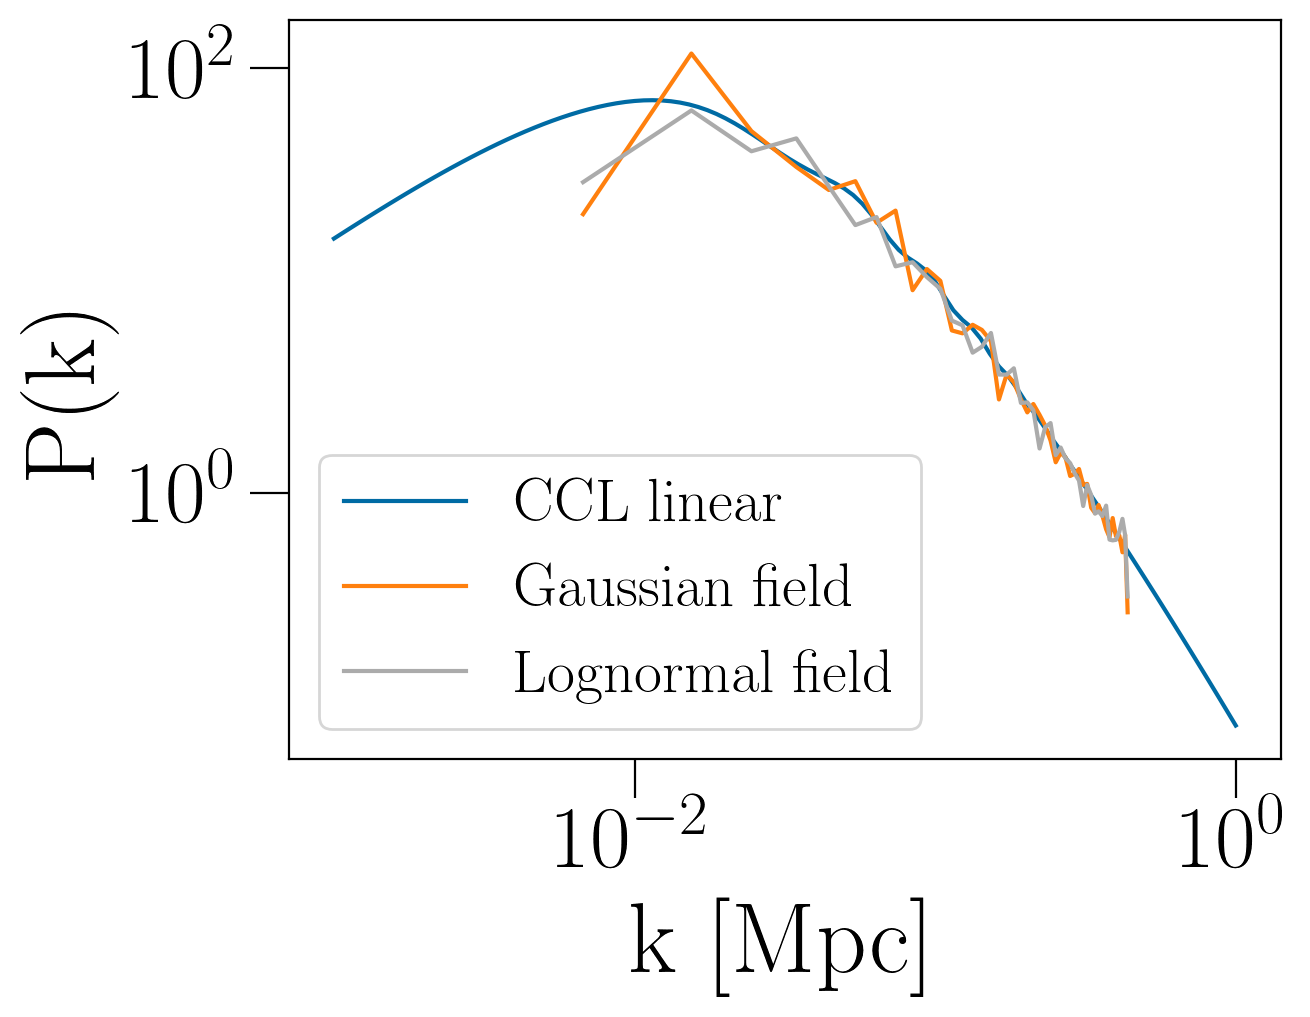

In [9]:
# compare P(k) computed from the fields to the input P(k)
plt.loglog(k,pk_ccl_lin/BoxSize,label='CCL linear')
plt.loglog(bins_field, p_k_field,label='Gaussian field')
plt.loglog(bins_lnfield, p_k_lnfield,label='Lognormal field')
plt.legend()
plt.xlabel('k [Mpc]')
plt.ylabel('P(k)');

## Plot multiple examples of LN fields

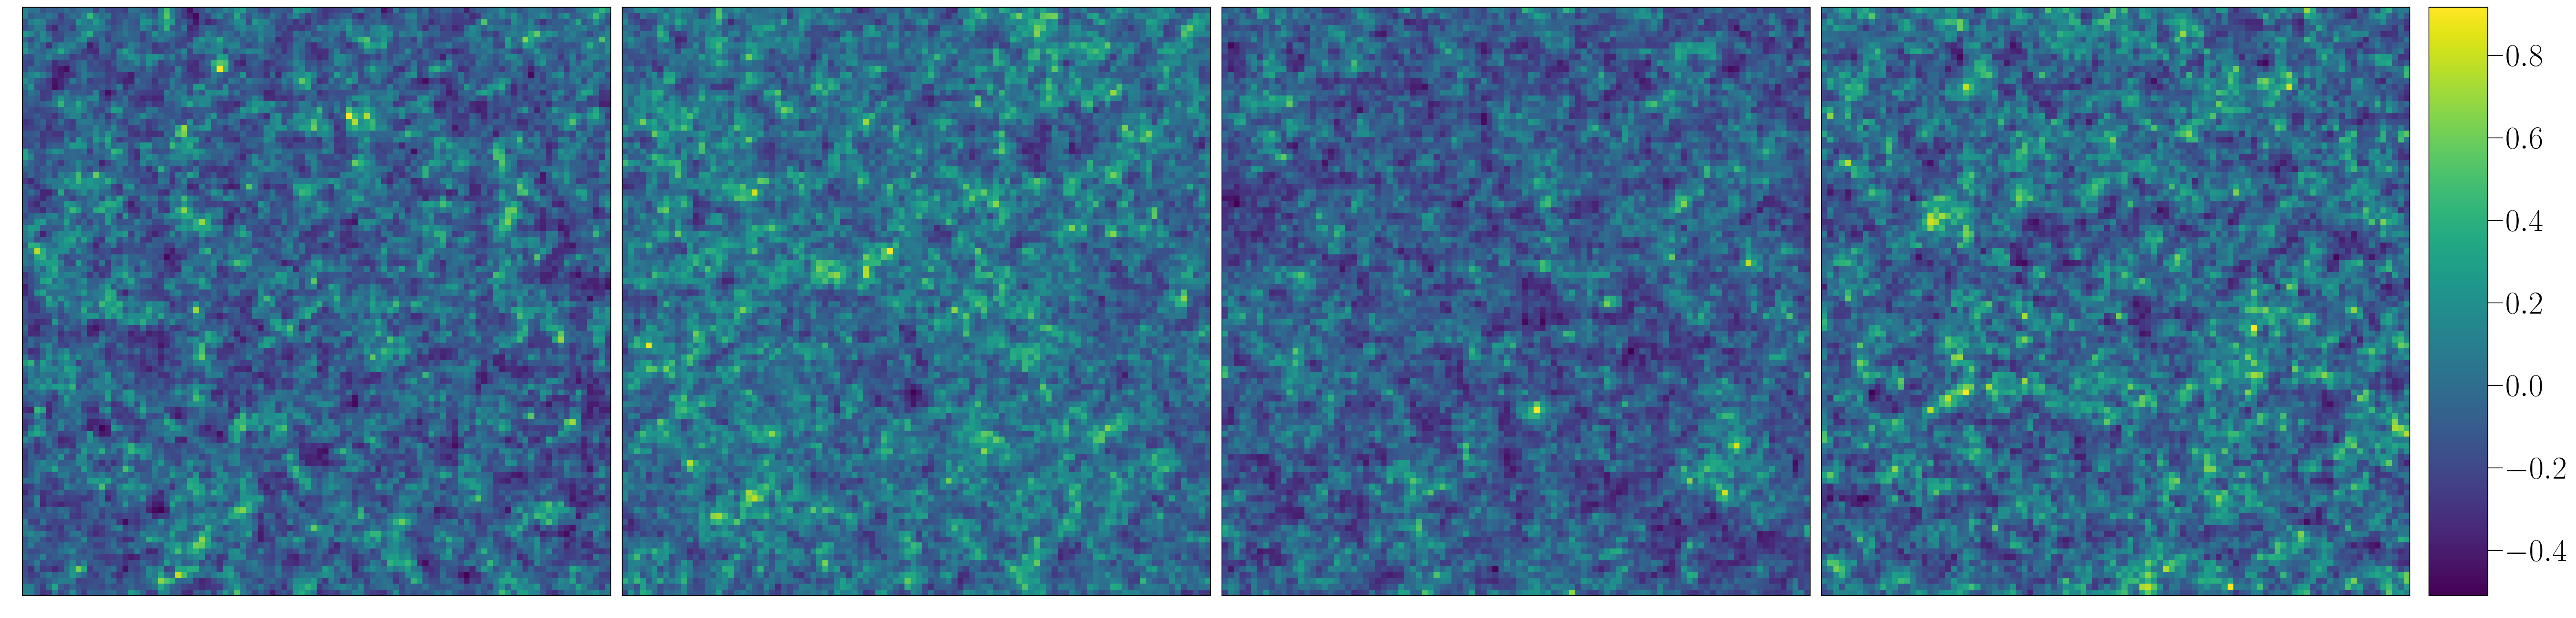

In [14]:
# Set up the image grid
fig = plt.figure(figsize=(44, 10))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,4),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="10%",
                 cbar_pad=0.25,
                 )
for i, ax in enumerate(grid):
    im = ax.imshow(maps_lognormal[i])
    ax.set_xticks([])
    ax.set_yticks([])

# Colorbar
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
ax.cax.tick_params(labelsize=30)
plt.show()